# Práctica 1
**Procesamiento de Lenguaje Natural**   
**Facultad de Ingenierıa,UNAM**  
**Flores García Karina**  
Objetivo: Preprocesar un corpus a partir de m ́etodos basados en lenguajes formales.

In [123]:
#Importa bibliotecsa
import nltk
import re
import string
#NLTK para obtener el corpus
from nltk.corpus import brown
from wordcloud import WordCloud #Paquetería para visualizar palabras
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

### Descarga de corpus en inglés

In [4]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\karin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [6]:
#Obtenemos el corpus como un texto
corpus = ' '.join(brown.words())
print(corpus[:1000])

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `` to have th

In [9]:
#Guarda el corpus de palabras
corpus = brown.words()
print(corpus)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [10]:
#Pasar todo el corpus a minusculas
corpus = [w.lower() for w in corpus]
print(corpus[:100])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'the', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'city', 'executive', 'committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.', 'the', 'september-october', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'mayor-nominate', 'ivan']


### Limpieza de signos de puntuación, de interrogación, admiración y elementos no léxicos.

In [80]:
#Expresión regular para limpieza de signos
exp_reg_signal = re.compile('[%s]' % re.escape(string.punctuation))
clean_signal = [exp_reg_signal.sub('', w) for w in corpus]
#Expresión regular para limpieza de números
clean_num = [w for w in clean_signal if re.sub("[0-9]*","",w)]
#Limpieza de expresiones como 7th
clean_corpus = [w for w in clean_num if w.isalpha()]
#Limpieza de espacios en blanco
clean_corpus = [w for w in clean_corpus if w!='']

In [81]:
print(clean_corpus[:1000])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'atlantas', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place', 'the', 'jury', 'further', 'said', 'in', 'termend', 'presentments', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'overall', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', 'the', 'septemberoctober', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possible', 'irregularities', 'in', 'the', 'hardfought', 'primary', 'which', 'was', 'won', 'by', 'mayornominate', 'ivan', 'allen', 'jr', 'only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', 'the', 'jury', 'said', 'considering', 'the', 'widesprea

### Limpieza de stopwords

In [12]:
#Descarga de lista de stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [82]:
#Obtención de stopwords para inglés
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
#Función para remover stopwords
def remove_stopwords(clean_corpus):
    return [w for w in clean_corpus if w not in stopwords_list]

#Corpus sin stopwords
corpus_no_stopwords = remove_stopwords(clean_corpus)
print(corpus_no_stopwords[:1000])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'atlantas', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place', 'jury', 'said', 'termend', 'presentments', 'city', 'executive', 'committee', 'overall', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted', 'septemberoctober', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'irregularities', 'hardfought', 'primary', 'mayornominate', 'ivan', 'allen', 'jr', 'relative', 'handful', 'reports', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voters', 'size', 'city', 'jury', 'said', 'find', 'many', 'georgias', 'registration', 'election', 'laws', 'outmoded', 'inadequate', 'often', 'ambiguous', 'recommended', 'fulton', 'legislators', 'act', 'laws', 'studied', 'revised', 'end', 'modernizing', 'improving', 'grand', '

### Aplicación del algoritmo de Porter para Stemming

In [84]:
porterAlgo = PorterStemmer()
corpus_stemmed = [porterAlgo.stem(w) for w in corpus_no_stopwords]
print(corpus_stemmed[:100])

['fulton', 'counti', 'grand', 'juri', 'said', 'friday', 'investig', 'atlanta', 'recent', 'primari', 'elect', 'produc', 'evid', 'irregular', 'took', 'place', 'juri', 'said', 'termend', 'present', 'citi', 'execut', 'committe', 'overal', 'charg', 'elect', 'deserv', 'prais', 'thank', 'citi', 'atlanta', 'manner', 'elect', 'conduct', 'septemberoctob', 'term', 'juri', 'charg', 'fulton', 'superior', 'court', 'judg', 'durwood', 'pye', 'investig', 'report', 'possibl', 'irregular', 'hardfought', 'primari', 'mayornomin', 'ivan', 'allen', 'jr', 'rel', 'hand', 'report', 'receiv', 'juri', 'said', 'consid', 'widespread', 'interest', 'elect', 'number', 'voter', 'size', 'citi', 'juri', 'said', 'find', 'mani', 'georgia', 'registr', 'elect', 'law', 'outmod', 'inadequ', 'often', 'ambigu', 'recommend', 'fulton', 'legisl', 'act', 'law', 'studi', 'revis', 'end', 'modern', 'improv', 'grand', 'juri', 'comment', 'number', 'topic', 'among', 'atlanta', 'fulton', 'counti', 'purchas']


### Frecuencias de los tipos en el corpus.

In [85]:
#Numero de tokens y tipos del corpus
tokens = len(corpus_stemmed)     #Núm tokens
tipos = len(set(corpus_stemmed)) #Núm tiposs

print('Número de tokens: {} \nNúmero de tipos: {}'.format(tokens, tipos))

Número de tokens: 530846 
Número de tipos: 29756


In [112]:
frequencies = Counter(corpus_stemmed)
common = list(frequencies.most_common())
less = list(reversed(common))


In [113]:
#Tipos con mayor frecuencia
print(common)

[('one', 3480), ('would', 2714), ('said', 1961), ('time', 1930), ('year', 1659), ('new', 1635), ('could', 1601), ('state', 1562), ('like', 1535), ('use', 1476), ('may', 1419), ('two', 1414), ('mr', 1379), ('first', 1361), ('man', 1352), ('even', 1319), ('make', 1225), ('work', 1178), ('made', 1125), ('day', 1088), ('also', 1069), ('way', 1038), ('mani', 1030), ('go', 1026), ('look', 1017), ('must', 1014), ('back', 1013), ('af', 996), ('get', 979), ('well', 976), ('come', 943), ('much', 937), ('peopl', 904), ('see', 894), ('good', 880), ('take', 874), ('gener', 840), ('us', 838), ('seem', 835), ('know', 833), ('littl', 831), ('world', 829), ('place', 823), ('say', 819), ('still', 793), ('nation', 787), ('men', 782), ('hand', 781), ('long', 773), ('hous', 747), ('life', 721), ('develop', 707), ('call', 704), ('need', 704), ('last', 702), ('thing', 701), ('right', 699), ('school', 697), ('never', 697), ('unit', 690), ('anoth', 689), ('great', 678), ('might', 672), ('turn', 668), ('mean', 

In [114]:
#Tipos con menos frecuencia
print(less)

[('stupefi', 1), ('boucl', 1), ('coralcolor', 1), ('oliveflush', 1), ('aviari', 1), ('perelman', 1), ('bilharziasi', 1), ('fluke', 1), ('yaw', 1), ('hor', 1), ('bodhisattva', 1), ('horoscop', 1), ('pityingli', 1), ('extremi', 1), ('batho', 1), ('hubri', 1), ('beggari', 1), ('masterli', 1), ('incubi', 1), ('roylott', 1), ('grimesbi', 1), ('processserv', 1), ('spector', 1), ('tallow', 1), ('contentedli', 1), ('chivi', 1), ('mio', 1), ('paglieri', 1), ('areaway', 1), ('scarifi', 1), ('yap', 1), ('carton', 1), ('bombay', 1), ('joss', 1), ('wisenheim', 1), ('befel', 1), ('ubermenschen', 1), ('pinbal', 1), ('pap', 1), ('fortyfifth', 1), ('fishmong', 1), ('cocu', 1), ('rooftre', 1), ('agoeng', 1), ('tjokorda', 1), ('balines', 1), ('rajah', 1), ('mem', 1), ('thugge', 1), ('kali', 1), ('subcontin', 1), ('travancor', 1), ('krishna', 1), ('siva', 1), ('ganessa', 1), ('applejack', 1), ('khartoum', 1), ('juju', 1), ('sudanes', 1), ('fantod', 1), ('chaulmoogra', 1), ('leprosi', 1), ('salpetrier', 1)

In [117]:
#Los 10 más frecuentes 
print("10 tipos más frecuentes: ", frequencies.most_common(10))


10 tipos más frecuentes:  [('one', 3480), ('would', 2714), ('said', 1961), ('time', 1930), ('year', 1659), ('new', 1635), ('could', 1601), ('state', 1562), ('like', 1535), ('use', 1476)]


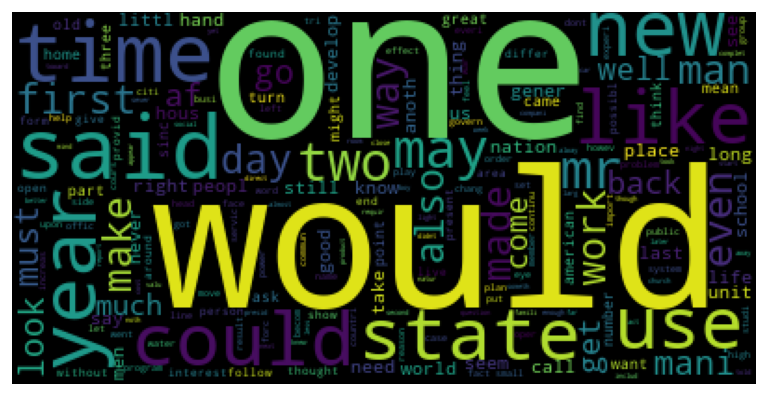

In [125]:
#Nube de tokens más frecuentes
mycloud = WordCloud()
mycloud.generate_from_frequencies(Counter(corpus_stemmed))

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(mycloud)
plt.axis("off")
plt.show()

In [118]:
#10 tipos menos frecuentes
print("10 tipos menos frecuentes: ", frequencies.most_common()[-10:])

10 tipos menos frecuentes:  [('hor', 1), ('yaw', 1), ('fluke', 1), ('bilharziasi', 1), ('perelman', 1), ('aviari', 1), ('oliveflush', 1), ('coralcolor', 1), ('boucl', 1), ('stupefi', 1)]
